# DLthon - 길찾는 오리들
## Base Settings

In [1]:
# importing the libraries
import keras
from keras import layers

keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

2025-01-21 15:58:49.678804: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 15:58:49.687288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737442729.696860  536533 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737442729.699605  536533 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 15:58:49.710155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets(
    "data/data_disruptive_feature_exclusion",
    val_split=0.4,)

Found 398 files belonging to 6 classes.
Using 239 files for training.
Using 159 files for validation.


I0000 00:00:1737442731.202048  536533 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
# designing the model
def eV2L_midsize3(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs) # image preprocessing
    x = models_base.EV2L((224, 224, 3))(x, training=False) # pre-trained model
    x = models_top.midsize3()(x) # top model
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                   metrics=['accuracy'])
    
    return model

eV2L_midsize3().summary()

2025-01-21 15:58:52.004751: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_midsize3 (Functional)     │ (None, 256)            │     1,837,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,586,221 (456.19 MB)

 Trainable params: 1,839,366 (7.02 MB)

 Non-trainable params: 117,746,855 (449.17 MB)

In [4]:
# training the model
eV2L_midsize3_history = eV2L_midsize3().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_midsize3.keras'),
        utils.callback_earlystop(30)
    ],
)

Epoch 1/200


I0000 00:00:1737442763.790392  536673 cuda_dnn.cc:529] Loaded cuDNN version 90600


4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.1730 - loss: 1.8275 - val_accuracy: 0.4219 - val_loss: 1.7299
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 850ms/step - accuracy: 0.2683 - loss: 1.7315 - val_accuracy: 0.3906 - val_loss: 1.6999
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 981ms/step - accuracy: 0.3099 - loss: 1.6972 - val_accuracy: 0.3125 - val_loss: 1.6843
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3979 - loss: 1.6401 - val_accuracy: 0.3594 - val_loss: 1.6632
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 935ms/step - accuracy: 0.4116 - loss: 1.5825 - val_accuracy: 0.4688 - val_loss: 1.6148
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 971ms/step - accuracy: 0.4040 - loss: 1.5946 - val_accuracy: 0.4688 - val_loss: 1.5703
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 921ms/step - accuracy: 0.4683 - loss: 1.5358 - val_accuracy: 0.4375 - val_loss: 1.5642
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 980ms/step - accuracy: 0.4970 - loss: 1.4966 - val_accuracy: 0.4688 - val_loss: 1.5003
E

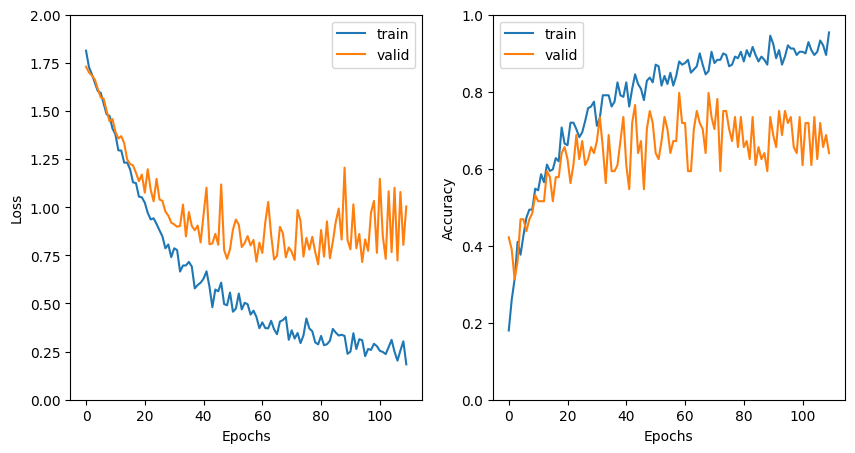

In [5]:
# visualizing the training process
utils.plot_history(eV2L_midsize3_history, loss_ylim=(0, 2))

In [6]:
# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_midsize3.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.8146 - loss: 0.6290
Test accuracy: 0.80%, Test loss: 0.69
